# **University of Abomey Calavi**  
### **LABEF – Laboratoire de Biomathématiques et d'Estimations Forestières**  

# **Support Vector Machines (SVM)**  


### **Prepared by:**  
- **Misewa Justine** — 25%  
- **Ogero Mercy** — 25%  
- **Jesugo Manasseh** — 25%  
- **Soglo Fiacre** — 25%  




## Problem Statement

Breast cancer is one of the leading causes of death among women worldwide.  
With early diagnosis, up to 97% of women can survive for more than five years.   
This project applies machine learning techniques to assist in classifying breast cancer cases for timely medical intervention.



## Objective

To develop a **Support Vector Machine (SVM)** classifier that accurately predicts whether a tumor is **benign** or **malignant** based on diagnostic features derived from medical imaging data.



## Dataset Description

The dataset being used contains records representing cell characteristics obtained from breast tissue samples.  
Each record includes measurements that describe the physical and structural properties of cell nuclei.  
These variables are used to determine whether a tumor is **benign** or **malignant**.

The following table lists the field names and their descriptions:

| Field Name   | Description                        |
|---------------|------------------------------------|
| ID            | Identifier                         |
| ClumpThick    | Clump thickness                    |
| UnifSize      | Uniformity of cell size            |
| UnifShape     | Uniformity of cell shape           |
| MargAdh       | Marginal adhesion                  |
| SingEpiSize   | Single epithelial cell size        |
| BareNuc       | Bare nuclei                        |
| BlandChrom    | Bland chromatin                    |
| NormNucl      | Normal nucleoli                    |
| Mit           | Mitoses                            |
| Class         | Tumor class (Benichine (SVM)** classifier.

- **Data Source** : https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
  

### Goal

To train, test, and evaluate the SVM model and assess its performance using accuracy, precision, recall, and F1-score.


In [7]:
#Step 1: Importing the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [12]:
# Importing the dataset
cell = r"C:\Users\Lenovo\OneDrive\Documents\Desktop\MBIOSTAT\ARTIFICIAL INTELLIGENCE\cell_samples.csv"

# Load the dataset
data = pd.read_csv(cell)



## DATA EXPLORATION

In [13]:
# Display the first few rows 
data.head()


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [14]:
data.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [15]:
# checking the shape of the data
data.shape

(699, 11)

In [16]:
# checking the count of values available in each column
data.count

<bound method DataFrame.count of           ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0    1000025      5         1          1        1            2       1   
1    1002945      5         4          4        5            7      10   
2    1015425      3         1          1        1            2       2   
3    1016277      6         8          8        1            3       4   
4    1017023      4         1          1        3            2       1   
..       ...    ...       ...        ...      ...          ...     ...   
694   776715      3         1          1        1            3       2   
695   841769      2         1          1        1            2       1   
696   888820      5        10         10        3            7       3   
697   897471      4         8          6        4            3       4   
698   897471      4         8          8        5            4       5   

     BlandChrom  NormNucl  Mit  Class  
0             3         1    1      2 

In [17]:
data.size

7689

In [18]:
# Check for missing values in the entire dataset
missing_values = data.isnull().sum()

# Filter to show only columns with at least one missing value
missing_values = missing_values[missing_values > 0]

# Print the results
if missing_values.empty:
    print("There are no missing values found")
else:
    print("Missing values found")

There are no missing values found


In [19]:
# Descriptive statistics
# putting all features together, apart from the ID, to form one variable
data_feat = ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 
                      'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']

# Finding the summary statistics of all the features
stat = data[data_feat].describe().T[['mean', 'std', 'min', 'max', '50%']]


print(stat)


                 mean       std  min   max  50%
Clump        4.417740  2.815741  1.0  10.0  4.0
UnifSize     3.134478  3.051459  1.0  10.0  1.0
UnifShape    3.207439  2.971913  1.0  10.0  1.0
MargAdh      2.806867  2.855379  1.0  10.0  1.0
SingEpiSize  3.216023  2.214300  1.0  10.0  2.0
BlandChrom   3.437768  2.438364  1.0  10.0  3.0
NormNucl     2.866953  3.053634  1.0  10.0  1.0
Mit          1.589413  1.715078  1.0  10.0  1.0


## Distribution of Classes

In [20]:
# Filtering the dataset to keep only benign samples (Class == 2)
# Then select the first 200 rows from this filtered subset using iloc that selects the rows by index that is position
# Storing the result in benign_data 

benign_data = data[data["Class"] == 2].iloc[0:200]
benign_data

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
355,857774,4,1,1,1,3,1,2,2,1,2
362,888169,3,2,2,1,4,3,2,1,1,2
363,888523,4,4,4,2,2,3,2,1,1,2
364,896404,2,1,1,1,2,1,3,1,1,2


In [21]:
# Filtering the dataset to keep only malignant samples (Class == 4)
# Then select the first 200 rows from this filtered subset using iloc that selects the rows by index that is position
# Storing the result in malignant_data 
malignant_data = data[data["Class"] == 4].iloc[0:200]
malignant_data

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
5,1017122,8,10,10,8,7,10,9,7,1,4
12,1041801,5,3,3,3,2,3,4,4,1,4
14,1044572,8,7,5,10,7,9,5,5,4,4
15,1047630,7,4,6,4,6,1,4,3,1,4
18,1050670,10,7,7,6,4,10,4,1,2,4
...,...,...,...,...,...,...,...,...,...,...,...
491,1119189,5,8,9,4,3,10,7,1,1,4
493,1142706,5,10,10,10,6,10,6,5,2,4
506,1286943,8,10,10,10,7,5,4,8,7,4
514,1306282,6,6,7,10,3,10,8,10,2,4


<Axes: xlabel='Clump', ylabel='UnifSize'>

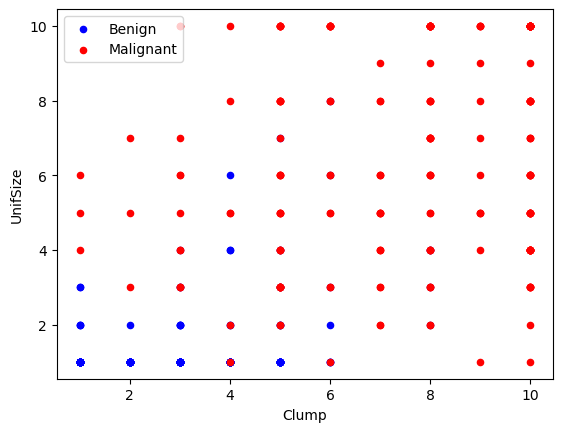

In [22]:
# Creating a scatter plot of Clump thickness (x-axis) vs Uniformity of cell size (y-axis)
# Malignant cells often have irregular shapes and sizes, so their Clump and UnifSize values tend to vary more
# The first plot creates a scatter of benign samples and stores the Axes object in 'axes'
# The second plot adds malignant samples on the same Axes using ax=axes
# ax=axes allows us to have both classes displayed on the same plot 

axes = benign_data.plot(kind="scatter", x = "Clump", y = "UnifSize", color = "blue", label = "Benign")
malignant_data.plot(kind="scatter", x = "Clump", y = "UnifSize", color = "red", label = "Malignant", ax = axes)

## DATA PROCESSING 

In [23]:
# Identifying the unwanted rows
#Checking the data types of all the columns 
print(data.dtypes)

# converting the column of BareNuc from string to interger
data_new = data[pd.to_numeric(data["BareNuc"], errors = "coerce").notnull()]
data_new["BareNuc"] = data_new["BareNuc"].astype("int")

# Calling on the new data types
data_new.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9196\1238447354.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new["BareNuc"] = data_new["BareNuc"].astype("int")


ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [24]:
# Removing unwanted columns
# Checking all the columns
data_new.columns


Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

# MODELLING

In [25]:
# Creating a feature set and removing the ID, the feature set will be used in the model
feature_df = data_new[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

# Creating a feature matrix x
# independent variables - 2D array: rows = samples, columns = features
x = np.asarray(feature_df)

# Creating the dependent variable y or the target variable
# dependent variables - 1D array: just a single value per sample
y = np.asarray(data_new["Class"])

# Display first 5 rows of features and target
print("First 5 rows of X (features):\n", x[:5])
print("\nFirst 5 values of y (target):\n", y[:5])


First 5 rows of X (features):
 [[ 5  1  1  1  2  1  3  1  1]
 [ 5  4  4  5  7 10  3  2  1]
 [ 3  1  1  1  2  2  3  1  1]
 [ 6  8  8  1  3  4  3  7  1]
 [ 4  1  1  3  2  1  3  1  1]]

First 5 values of y (target):
 [2 2 2 2 2]


In [26]:
# Normalize the data (Min-Max scaling)
# Scales features to the range [0,1]
scaler = MinMaxScaler()  

# Fit the scaler to X and transform
x_scaled = scaler.fit_transform(x)

In [27]:
# Define hyperparameter ranges
param_dist = {
    'C': np.random.uniform(0.1, 30, 25),      
    'gamma': np.random.uniform(0.1, 30, 25)}

# MODEL TRAINING

## Divide the data to training part and testing set

In [28]:

# We divide the data set called data_new to training and testing. The ratio used is 80% for training and 20% for testing 
# train(x,y) , x is a 2D array while y is a 1D array
# random_state makes the split reproducible
# Stratify helps maintain the same class proportions in train & test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 48, stratify=y)

print(x_train.shape)
print(y_train.shape)

(546, 9)
(546,)


In [29]:
# testing results
print(x_test.shape)
print(y_test.shape)

(137, 9)
(137,)


## Modelling using Scikit-learn

In [30]:
# Support Vector Classifier (SVC)
# C is the penalty imposed on incorrectly classified data, specify the units of penalty 
# here we are assuming the kernl is linear
classifier = svm.SVC(kernel = "linear", C = 2)

#Train the classifier on the training data
classifier.fit(x_train, y_train)

#Make predictions on the test data
y_predict = classifier.predict(x_test)

## Evaluation(Results)

In [31]:
# compares predicted labels (y_predict) to the actual labels (y_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       0.98      0.96      0.97        89
           4       0.92      0.96      0.94        48

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137



### Results

- **Class labels:**  
  - `2` = Benign (not cancerous)  
  - `4` = Malignant (cancerous)  

- **Metrics:**  
  - **Precision:** Of all samples predicted as a class, how many were correct.  
    - Example: 0.98 precision for Benign → 98% of predicted benign cases were correct.  
  - **Recall:** Of all actual samples in a class, how many were correctly identified.  
    - Example: 0.96 recall for Malignant → 96% of malignant cases were detected.  
  - **F1-score:** Combines precision and recall into a single balanced number.  
  - **Support:** Number of samples in each class in the test set.  

- **Overall Accuracy:** 0.96 → 96% of all test samples were predicted correctly.  
- **Macro avg:** Average metrics treating both classes equally.  
- **Weighted avg:** Average metrics considering class size.  

**Interpretation:** The model achieved high precision and recall for both classes, is balanced, and effectively distinguishes between Benign and Malignant tumors.


## Hyperparameter Tuning with Automatic Kernel Selection

In [32]:
# Define ranges of parameters for SVM
param_dist = {
    'C': np.linspace(0.1, 20, 20),           # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],     # Kernel types
    'gamma': ['scale', 'auto'],              # Kernel coefficient
    'degree': [2, 3, 4],                     # Degree for poly kernel
    'class_weight': [None, 'balanced']       # Handle class imbalance
}

In [33]:
# Base SVM model
svm_model = SVC(random_state=42, probability=True)


In [34]:
# Randomized search to find best hyperparameters
random_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_dist,
    n_iter=25,            # Number of random combinations to try
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',   # Metric to optimize
    random_state=42,
    n_jobs=-1,            # Use all CPU cores
    verbose=1
)


In [35]:
from datetime import datetime

# Train the model and measure time
start_time = datetime.now()
random_search.fit(x_train, y_train)
end_time = datetime.now()

print("Training Time:", end_time - start_time)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Training Time: 0:00:09.823575


In [36]:
# Best parameters and model
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Accuracy:", random_search.best_score_)

best_svm = random_search.best_estimator_


Best Parameters: {'kernel': 'linear', 'gamma': 'auto', 'degree': 4, 'class_weight': 'balanced', 'C': 0.1}
Best Cross-Validation Accuracy: 0.9724937447873229


In [37]:
# Make predictions using the best SVM
y_pred = best_svm.predict(x_test)
y_pred_proba = best_svm.predict_proba(x_test)  # For ROC/AUC


In [38]:
# Convert to binary for ROC
y_test_binary = (y_test == 4).astype(int)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)

print("ROC AUC Score:", roc_auc)

# Optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)


ROC AUC Score: 0.9948501872659176
Optimal Threshold: 0.5201886402446791


In [42]:
from sklearn.metrics import confusion_matrix

# Make predictions first
y_pred = best_svm.predict(x_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)



Confusion Matrix:
 [[85  4]
 [ 1 47]]


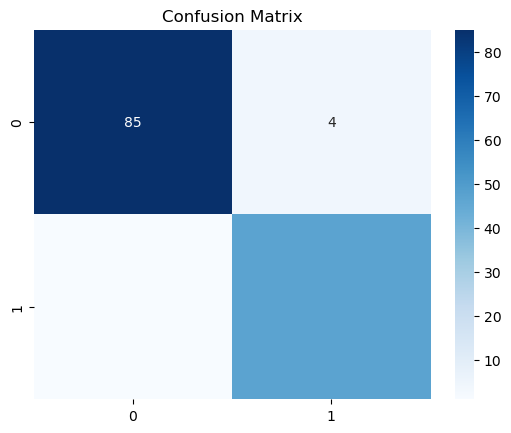

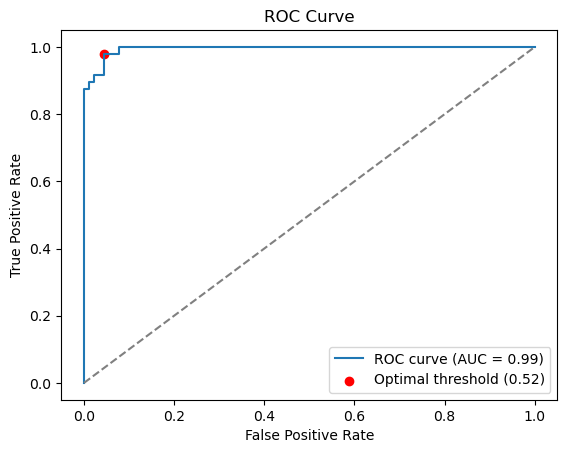

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC curve
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f'Optimal threshold ({optimal_threshold:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
